In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
#!pip install nltk
#!pip install wordcloud

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import  TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
df_rev = pd.read_csv('data-tong.csv')
df_rev = df_rev.loc[:, ~df_rev.columns.str.contains('^Unnamed')]
df_rev.head()

,product,customer_name,rating,comment,datetime,category
0,dau goi kho,quynhluu85,5,"Sản phẩm giá rẻ, dùng ok. Mùi thơm dễ chịu. Ls...",9/9/2022 15:36,HỒNG
1,dau goi kho,4diwu4dnzp,3,Chưa dùng nên không biết nhưng mà trước có dùn...,2022-13-09 19:24:00,HỒNG
2,dau goi kho,tranghuyenlthttn,5,"Thơmm. Nhanh hết lém huhu, dùng màu này rấc ổn...",2022-17-09 20:27:00,XANH
3,dau goi kho,m*****3,5,Tao không biết eto em yêu cầu các đơn vị này k...,2022-18-08 22:56:00,HỒNG
4,dau goi kho,n*****n,5,Ban đầu mũi có hơi hắc nhưng về sau dịu giao h...,2022-15-09 22:05:00,HỒNG


In [67]:
df_rev[df_rev['rating'] == 1].head()

,product,customer_name,rating,comment,datetime,category,text length
8899,mat na nhau thai,h*****1,1,Mặt nạ fake lòi ra. Dưỡng chất gì mà như nước ...,9/12/2022 12:28,NaN,156
8900,mat na nhau thai,linh_lee98,1,Dùng được 2 ngày da bị nổi đầy nốt mẩn đỏ chắ...,7/24/2021 1:47,NaN,113
8901,mat na nhau thai,s8yd5emgi4,1,hi,8/24/2022 13:09,NaN,2
8902,mat na nhau thai,chinh.min.046,1,"Mình hay mua của shop khác đắt hơn nhiều, nhg ...",6/5/2022 9:33,NaN,246
8903,mat na nhau thai,mintwyb,1,Vaseline hàng fake nên không tin tưởng mặt nạ ...,6/27/2021 11:59,NaN,87


In [57]:
df_rev['text length'] = df_rev['comment'].apply(len)
df_rev.head()

,product,customer_name,rating,comment,datetime,category,text length
0,dau goi kho,quynhluu85,5,"Sản phẩm giá rẻ, dùng ok. Mùi thơm dễ chịu. Ls...",9/9/2022 15:36,HỒNG,74
1,dau goi kho,4diwu4dnzp,3,Chưa dùng nên không biết nhưng mà trước có dùn...,2022-13-09 19:24:00,HỒNG,300
2,dau goi kho,tranghuyenlthttn,5,"Thơmm. Nhanh hết lém huhu, dùng màu này rấc ổn...",2022-17-09 20:27:00,XANH,115
3,dau goi kho,m*****3,5,Tao không biết eto em yêu cầu các đơn vị này k...,2022-18-08 22:56:00,HỒNG,60
4,dau goi kho,n*****n,5,Ban đầu mũi có hơi hắc nhưng về sau dịu giao h...,2022-15-09 22:05:00,HỒNG,56


In [58]:
df_rev.isnull().any().any()

True

In [59]:
import plotly.express as px
cplot = px.histogram(df_rev, x='rating', barmode='group', facet_col='product')
cplot.show()

In [60]:
import plotly.figure_factory as ff
# import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = [df_rev['text length']]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title='Text Length Distribution',
                  xaxis_title='text length',
                   yaxis_title='density')
fig.show()

In [61]:
text = df_rev[['rating','comment']]
text.head()

,rating,comment
0,5,"Sản phẩm giá rẻ, dùng ok. Mùi thơm dễ chịu. Ls..."
1,3,Chưa dùng nên không biết nhưng mà trước có dùn...
2,5,"Thơmm. Nhanh hết lém huhu, dùng màu này rấc ổn..."
3,5,Tao không biết eto em yêu cầu các đơn vị này k...
4,5,Ban đầu mũi có hơi hắc nhưng về sau dịu giao h...


In [68]:
# my_file = open("vietnamese-stopwords.txt", encoding="utf8")
my_file = open("clean.txt", encoding="utf8")
content = my_file.read()
cachedStopWords = content.split("\n")
my_file.close()
custom_stopword = set(cachedStopWords)

# my_file_i = open("clean - issue.txt", encoding="utf8")
# content_i = my_file_i.read()
# cachedStopWords_i = content_i.split("\n")
# my_file_i.close()
# custom_stopword_i = set(cachedStopWords_i)

def remove_punc_stopword(text):

    remove_punc = [word for word in text.lower() if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word for word in remove_punc.split() if word not in cachedStopWords]

# def remove_punc_stopword_i(text):

#     remove_punc = [word for word in text.lower() if word not in string.punctuation]
#     remove_punc = ''.join(remove_punc)
#     return [word for word in remove_punc.split() if word not in cachedStopWords_i]

In [69]:
cleaned_text = text.copy()
cleaned_text['text'] = text['comment'].apply(remove_punc_stopword)

In [70]:
def plot_Freq(data):
    FreqDist(np.concatenate(data.text.reset_index(drop=True))).plot(20, cumulative=False)

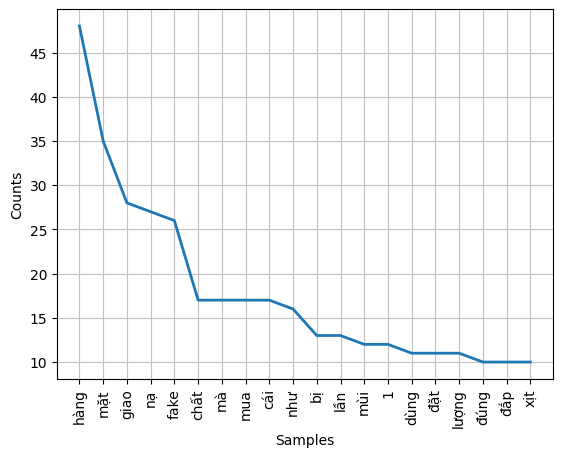

In [71]:
plot_Freq(cleaned_text[cleaned_text['rating']==1])

In [72]:
def reviewCloud(rating):
    ratingtext = ' '.join(text[text['rating']==rating]['comment'])
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black',
        stopwords = custom_stopword).generate(str(ratingtext))

    fig = plt.figure(
        figsize = (10, 7),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)

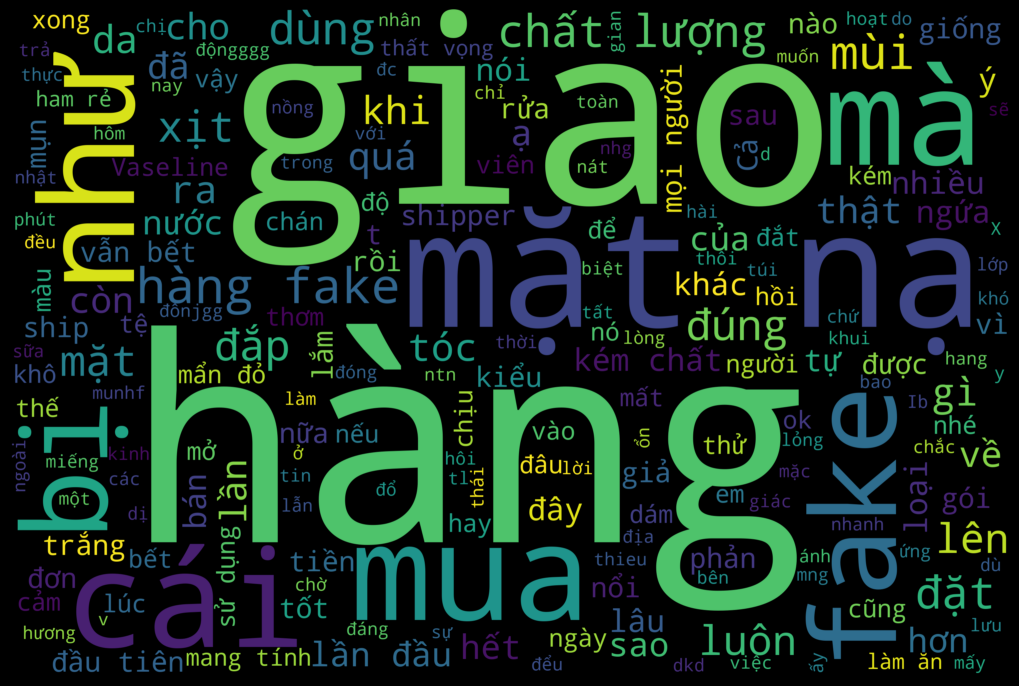

In [73]:
reviewCloud(1)

In [75]:
selected_words = ['lâu','fake','nhanh','bết','thái','độ','shipper','giả','kém','ổn','lại']

In [77]:
vectorizer = CountVectorizer(vocabulary=selected_words, lowercase=False)

selected_word_count = vectorizer.fit_transform(cleaned_text['comment'].values.astype('U'))
vectorizer.get_feature_names()

['lâu',
 'fake',
 'nhanh',
 'bết',
 'thái',
 'độ',
 'shipper',
 'giả',
 'kém',
 'ổn',
 'lại']

In [79]:
word_count_array = selected_word_count.toarray()
word_count_array.shape
#print(word_count_array)

(9009, 11)

In [80]:
rest = pd.DataFrame(index=vectorizer.get_feature_names(), \
                    data=word_count_array.sum(axis=0)).rename(columns={0: 'Count'})

<AxesSubplot:>

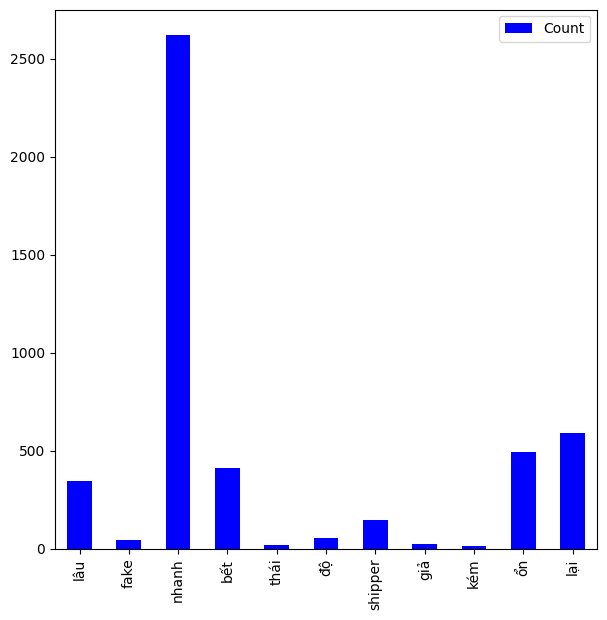

In [82]:
rest.plot(kind='bar', stacked=False, figsize=[7,7], colormap='winter')

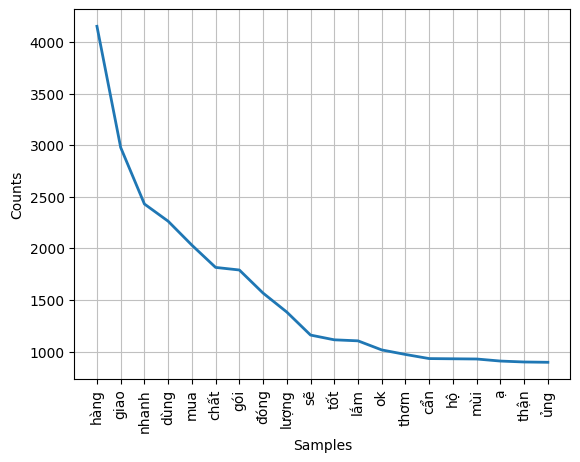

In [84]:
plot_Freq(cleaned_text[cleaned_text['rating']==5])

In [85]:
select_stars = text[(text['rating']==1) | (text['rating']==5)]

In [86]:
x = select_stars['comment']
y = select_stars['rating']

In [87]:
count_vec = CountVectorizer().fit(x)
x = count_vec.transform(x)

In [88]:
print("Shape of the sparse matrix: ", x.shape)

Shape of the sparse matrix:  (8718, 6888)


In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [90]:
mnb = MultinomialNB()

mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))
print("Classification Report:",classification_report(y_test,predmnb))

Confusion Matrix for Multinomial Naive Bayes:
[[   0   28]
 [  60 1656]]
Score: 94.95
Classification Report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           5       0.98      0.97      0.97      1716

    accuracy                           0.95      1744
   macro avg       0.49      0.48      0.49      1744
weighted avg       0.97      0.95      0.96      1744



In [91]:
tfidf_transformer = TfidfTransformer()
x_tfidf = tfidf_transformer.fit_transform(x)

x_tfidf_train, x_tfidf_test, y_tfidf_train, y_tfidf_test = train_test_split(x_tfidf,y, test_size=0.2, random_state=42)

mnb_tfidf = MultinomialNB()

mnb_tfidf.fit(x_tfidf_train,y_tfidf_train)
pred_mnb_tfidf = mnb_tfidf.predict(x_tfidf_test)

print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_tfidf_test,pred_mnb_tfidf))
print("Score:",round(accuracy_score(y_tfidf_test,pred_mnb_tfidf)*100,2))
print("Classification Report:",classification_report(y_tfidf_test,pred_mnb_tfidf))

Confusion Matrix for Multinomial Naive Bayes:
[[   0   28]
 [   6 1710]]
Score: 98.05
Classification Report:               precision    recall  f1-score   support

           1       0.00      0.00      0.00        28
           5       0.98      1.00      0.99      1716

    accuracy                           0.98      1744
   macro avg       0.49      0.50      0.50      1744
weighted avg       0.97      0.98      0.97      1744



In [93]:
rmfr = RandomForestClassifier()
rmfr.fit(x_train,y_train)
predrmfr = rmfr.predict(x_test) 
print("Confusion Matrix for Random Forest Classifier:") 
print(confusion_matrix(y_test,predrmfr)) 
print("Score:",round(accuracy_score(y_test,predrmfr)*100,2)) 
print("Classification Report:",classification_report(y_test,predrmfr))

Confusion Matrix for Random Forest Classifier:
[[   8   20]
 [   5 1711]]
Score: 98.57
Classification Report:               precision    recall  f1-score   support

           1       0.62      0.29      0.39        28
           5       0.99      1.00      0.99      1716

    accuracy                           0.99      1744
   macro avg       0.80      0.64      0.69      1744
weighted avg       0.98      0.99      0.98      1744



In [104]:
positive_review = text['comment'][2]
print(positive_review)
print("Actual Rating: ",text['rating'][2])
pr_t = count_vec.transform([positive_review])
print("Predicted Rating:")
mnb.predict(pr_t)[0]

Thơmm. Nhanh hết lém huhu, dùng màu này rấc ổn nên tậu hẳn 2 chai nữaa. Lúc đầu mua xanh vs hồng nma hồng cứ bị khô
Actual Rating:  5
Predicted Rating:


5

In [106]:
negative_review = text['comment'][8902]
print(negative_review)
print("Actual Rating: ",text['rating'][8902])
nr_t = count_vec.transform([negative_review])
print("Predicted Rating:")
mnb.predict(nr_t)[0]

Mình hay mua của shop khác đắt hơn nhiều, nhg thấy shop này có lượt mua cao nên đặt thử 20 miếng. Khi dùng thấy mùi hương khác vs shop kia, và sáng nay ngủ dậy mặt mình bị mẩn đỏ hết lên ngay lần đầu tiên sử dụng . Trải nghiệm lần đầu nhg rất tệ.
Actual Rating:  1
Predicted Rating:


5